In [17]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [18]:
atribut = ['Waktu','Paket','Frekweksi','Prioritas','Gangguan']
ds = pd.read_csv('tree.csv',names=atribut)
ds

,Waktu,Paket,Frekweksi,Prioritas,Gangguan
0,Pendek,Besar,Sedang,Rendah,Gangguan
1,Pendek,Kecil,Rendah,Tinggi,Gangguan
2,Panjang,Besar,Sedang,Tinggi,Normal
3,Panjang,Kecil,Tinggi,Rendah,Normal
4,Pendek,Besar,Tinggi,Tinggi,Gangguan
5,Panjang,Kecil,Rendah,Tinggi,Gangguan
6,Panjang,Kecil,Tinggi,Rendah,Gangguan
7,Panjang,Kecil,Sedang,Rendah,Normal
8,Panjang,Besar,Tinggi,Tinggi,Normal
9,Panjang,Kecil,Sedang,Rendah,Gangguan


In [19]:
dum = pd.get_dummies(ds[['Waktu','Paket','Frekweksi','Prioritas']])
dum

,Waktu_Panjang,Waktu_Pendek,Paket_Besar,Paket_Kecil,Frekweksi_Rendah,Frekweksi_Sedang,Frekweksi_Tinggi,Prioritas_Rendah,Prioritas_Tinggi
0,0,1,1,0,0,1,0,1,0
1,0,1,0,1,1,0,0,0,1
2,1,0,1,0,0,1,0,0,1
3,1,0,0,1,0,0,1,1,0
4,0,1,1,0,0,0,1,0,1
5,1,0,0,1,1,0,0,0,1
6,1,0,0,1,0,0,1,1,0
7,1,0,0,1,0,1,0,1,0
8,1,0,1,0,0,0,1,0,1
9,1,0,0,1,0,1,0,1,0


In [20]:
hasil = tree.DecisionTreeClassifier(criterion='entropy')
hasil_train = hasil.fit(dum,ds['Gangguan'])

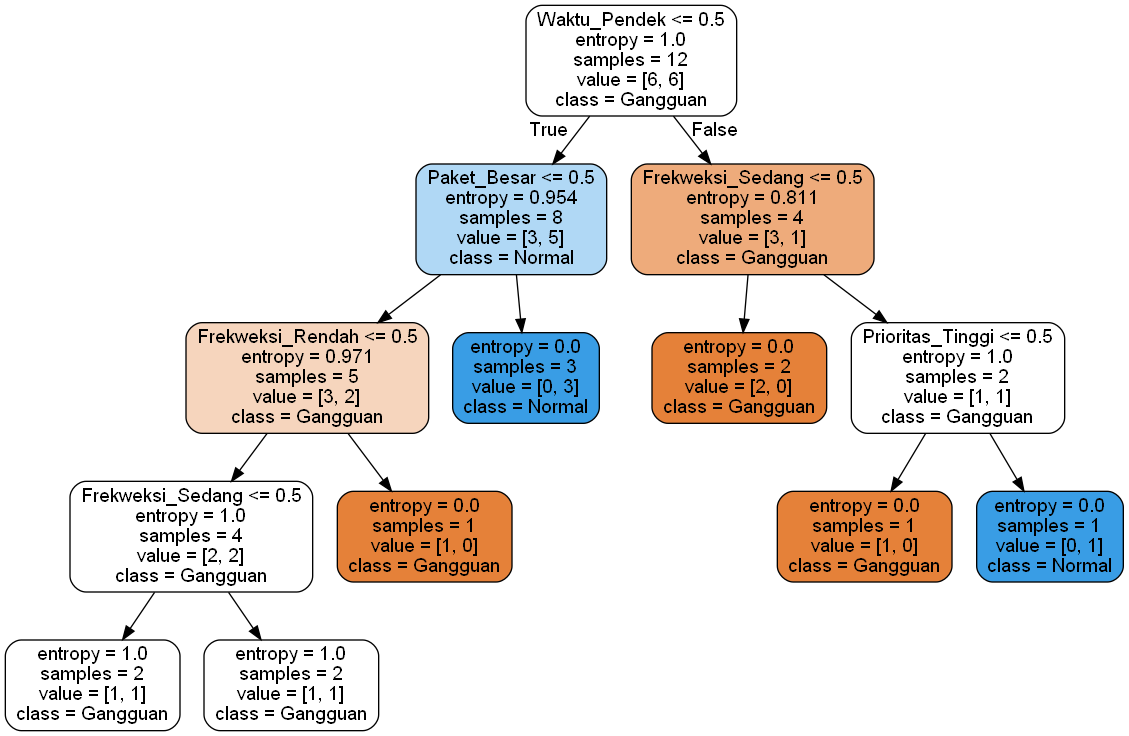

In [21]:
dot_data = tree.export_graphviz(hasil_train,out_file=None,feature_names=list(dum.columns.values),
                                class_names=['Gangguan','Normal'],rounded=True,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())                                                                            

In [25]:
#Prediksi kuyyyyyyyy :v 
#waktu = pendek, paket=tdk ada,frek = sedang, prioritas = tinggi
prediksi = hasil_train.predict([[0,1,0,0,0,1,0,0,1]])
prediksi

array(['Normal'], dtype=object)